# Importing Packages

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Loading the Data

In [3]:
Data = pd.read_csv('dataset_III.csv')
Data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Pre-Processing

In [13]:
x = Data.copy()
x.pop('output')
x = np.array(x)
y = np.array(Data['output'])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [50]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

# Classification

K=  1
F1 Score on Train set:  1.0
F1 Score on Test set:  0.7884615384615384 

K=  2
F1 Score on Train set:  0.8995215311004785
F1 Score on Test set:  0.7608695652173915 

K=  3
F1 Score on Train set:  0.9074889867841409
F1 Score on Test set:  0.8181818181818182 

K=  4
F1 Score on Train set:  0.8999999999999999
F1 Score on Test set:  0.8235294117647058 

K=  5
F1 Score on Train set:  0.8888888888888888
F1 Score on Test set:  0.8411214953271027 

K=  6
F1 Score on Train set:  0.8859649122807017
F1 Score on Test set:  0.8349514563106797 

K=  7
F1 Score on Train set:  0.8702928870292886
F1 Score on Test set:  0.8703703703703703 

K=  8
F1 Score on Train set:  0.8695652173913043
F1 Score on Test set:  0.8846153846153846 

K=  9
F1 Score on Train set:  0.8770491803278688
F1 Score on Test set:  0.851851851851852 

K=  10
F1 Score on Train set:  0.8717948717948718
F1 Score on Test set:  0.8761904761904761 

K=  11
F1 Score on Train set:  0.871369294605809
F1 Score on Test set:  0.85185185185

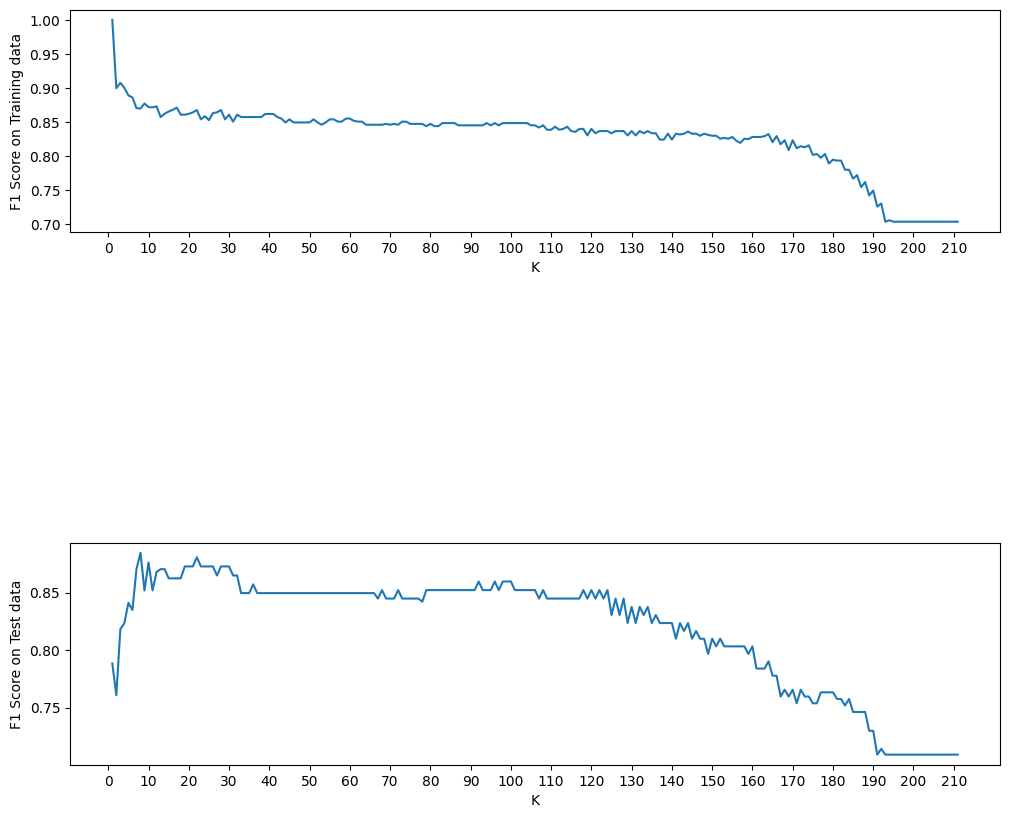

In [55]:
k = np.arange(1,x_train.shape[0],1)

def KNN(k, D1, D2):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(x_train, y_train)
  y_hat = model.predict(x_test)
  y_hat_train = model.predict(x_train)
  f1 = f1_score(y_test, y_hat)
  f1_train = f1_score(y_train, y_hat_train)
  print('K= ', k)
  print('F1 Score on Train set: ', f1_train)
  D1.append(f1_train)
  print('F1 Score on Test set: ', f1, '\n')
  D2.append(f1)

D1 = []
D2 = []

for i in k:
  KNN(i, D1, D2)

plt.figure(num=1, figsize=(12, 10), dpi=100)

plt.subplot(3,1,1)
plt.plot(k,D1)
plt.xticks(np.arange(0, x_train.shape[0]+1, 10))
plt.xlabel('K')
plt.ylabel('F1 Score on Training data')

plt.subplot(3,1,3)
plt.plot(k,D2)
plt.xticks(np.arange(0, x_train.shape[0]+1, 10))
plt.xlabel('K')
plt.ylabel('F1 Score on Test data')

plt.show()

In [56]:
print('Best Value of k:' , k[np.argmax(D2)])
print('Resulting Training F1 Score:', D1[np.argmax(D2)])
print('Resulting Test F1 Score:', D2[np.argmax(D2)])

Best Valuse of k: 8
Resulting Training F1 Score: 0.8695652173913043
Resulting Test F1 Score: 0.8846153846153846
